# Breast Histopathology images classification with deep learning Models

**Context**

Invasive Ductal Carcinoma (IDC) is the most common subtype of all breast cancers. To assign an aggressiveness grade to a whole mount sample, pathologists typically focus on the regions which contain the IDC. As a result, one of the common pre-processing steps for automatic aggressiveness grading is to delineate the exact regions of IDC inside of a whole mount slide.

**Content**

The original dataset consisted of 162 whole mount slide images of Breast Cancer (BCa) specimens scanned at 40x. From that, 277,524 patches of size 50 x 50 were extracted (198,738 IDC negative and 78,786 IDC positive). Each patch’s file name is of the format: uxXyYclassC.png — > example 10253idx5x1351y1101class0.png . Where u is the patient ID (10253idx5), X is the x-coordinate of where this patch was cropped from, Y is the y-coordinate of where this patch was cropped from, and C indicates the class where 0 is non-IDC and 1 is IDC.

# What is breast Cancer?
Cancer occurs when changes called mutations take place in genes that regulate cell growth. The mutations let the cells divide and multiply in an uncontrolled way.

Breast cancer is cancer that develops in breast cells. Typically, the cancer forms in either the lobules or the ducts of the breast.

Lobules are the glands that produce milk, and ducts are the pathways that bring the milk from the glands to the nipple. Cancer can also occur in the fatty tissue or the fibrous connective tissue within your breast.

The uncontrolled cancer cells often invade other healthy breast tissue and can travel to the lymph nodes under the arms. The lymph nodes are a primary pathway that help the cancer cells move to other parts of the body

# Why is breast cancer considered as a serious phenomenon?
The main risk factors for breast cancer include being a woman and getting older (most breast cancers are found in women ages 55 and older).
 Uncontrollable factors that may increase risk include personal/family history, race, breast density and menstrual period history. 
 
In addition, having changes in certain breast cancer genes (BRCA1 and BRCA2) increases the risk of developing breast cancer.

Certain risk factors are lifestyle-related, including the use of birth control pills, hormone therapy after menopause, having children, drinking alcohol, being overweight or obese, and not being physically active.

 Having one or several risk factors does not mean a woman will develop breast cancer. “Women need to become familiar with all of the risk factors. 

Hence this project mainly focuses on classifying images based on different deep learning methods ie cnn for classification of images of breast cances and data is taken from Kaggle.

# Download from Kaggle site

In [ ]:
! pip install -q kaggle

In [ ]:
 from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shraddhaseshadri","key":"96fa7ca5bfb794fe0fc3dc75ef21bff8"}'}

In [ ]:
 ! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                       title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                                 2022 Ukraine Russia War                               1KB  2022-03-21 10:24:45           2095        155  1.0              
datasets/prasertk/healthy-lifestyle-cities-report-2021                    Healthy Lifestyle Cities Report 2021                  2KB  2022-03-03 00:26:02           2511         82  1.0              
datasets/prasertk/netflix-daily-top-10-in-us                              Netflix daily top 10                                 70KB  2022-03-12 13:22:19           1050         29  1.0              
datasets/v

In [ ]:
!kaggle datasets download -d "paultimothymooney/breast-histopathology-images"

100% 3.08G/3.10G [00:21<00:00, 196MB/s]
100% 3.10G/3.10G [00:21<00:00, 155MB/s]


In [ ]:
!unzip "/content/breast-histopathology-images.zip"

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_

# Import the necessary Libraries

In [ ]:
!pip freeze > requirements.txt

In [ ]:
# import the libraries required for carrying out the given analysis of the data
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
import os
from os.path import isfile
import tensorflow as tf
import keras
from keras.utils import np_utils
import itertools
import shutil
np.random.seed(42)
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [ ]:
tf.keras.__version__

'2.6.0'

# Data Extraction

In [ ]:
#Prepare a directory of the images that we have downloaded for the givedn dataset
all_images_dir = 'all_images_dir'
os.mkdir(all_images_dir)

# Create Positive subdirectory within all images
#inside the directory which is given above prepare two separate folders having values 1 and 0
#1 meaning positive images
#0 meaning negative images
os.mkdir('all_images_dir/1')
os.mkdir('all_images_dir/0')

# Copy Data into Directories

In [ ]:
#creating path of the directory
# copies all images from their seperate folders into the same 
# folder called all_images_dir


# create a list of all patient id's
# each patient id folder has 2 sub folders --> folder 0 and folder 1

# Example:
    # '10285'
        # '0'
        # '1'
cur_dir = os.getcwd()
patient_list = os.listdir(cur_dir)

for patient in patient_list:
  
  try:
    
    path_0 = str(patient) + '/0'
    path_1 = str(patient) + '/1'

    # create a list of all files in folder 0
    file_list_0 = os.listdir(path_0)
    # create a list of list all file in folder 1
    file_list_1 = os.listdir(path_1)

    # move the 0 images to all_images_dir
    for fname in file_list_0:

        # source path to image
        src = os.path.join(path_0, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, '0', fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    # move the 1 images to all_images_dir
    for fname in file_list_1:

        # source path to image
        src = os.path.join(path_1, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, '1', fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
        
  except:
     print(patient, 'cannot be copied into proper folder')


.config cannot be copied into proper folder
kaggle.json cannot be copied into proper folder
all_images_dir cannot be copied into proper folder
breast-histopathology-images.zip cannot be copied into proper folder
IDC_regular_ps50_idx5 cannot be copied into proper folder
sample_data cannot be copied into proper folder


In [ ]:
print('Total:', len(os.listdir('all_images_dir/1'))+len(os.listdir('all_images_dir/0')))#prints total images in dataset
print('Positive:', len(os.listdir('all_images_dir/1')))#prints total numberf of positive images
print('Negative:', len(os.listdir('all_images_dir/0')))#prints total number of negative images

Total: 277524
Positive: 78786
Negative: 198738


# Make Dataframe of image info

In [ ]:
#Create a dataframe that contains all the information
image_list_1 = os.listdir('all_images_dir/1')
df_data_1 = pd.DataFrame(image_list_1, columns=['image_id'])

image_list_0 = os.listdir('all_images_dir/0')
df_data_0 = pd.DataFrame(image_list_0, columns=['image_id'])

df_data = pd.concat([df_data_1, df_data_0])

In [ ]:
df_data.head()

image_id
0   9345_idx5_x2701_y1001_class1.png
1   16553_idx5_x751_y1701_class1.png
2   15634_idx5_x501_y1601_class1.png
3  12878_idx5_x1851_y2301_class1.png
4  16165_idx5_x2251_y2251_class1.png

In [ ]:
#Define helper functions
def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    # the id is the first index in the list
    patient_id = a[0]
    
    return patient_id

def extract_target(x):
    # split into a list
    a = x.split('_')
    # the target is part of the string in index 4
    b = a[4]
    # the ytarget i.e. 1 or 2 is the 5th index of the string --> class1
    target = b[5]
    
    return target

# extract the patient id

# create a new column called 'patient_id'
df_data['patient_id'] = df_data['image_id'].apply(extract_patient_id)
# create a new column called 'target'
df_data['target'] = df_data['image_id'].apply(extract_target)

df_data.head()

image_id patient_id target
0   9345_idx5_x2701_y1001_class1.png       9345      1
1   16553_idx5_x751_y1701_class1.png      16553      1
2   15634_idx5_x501_y1601_class1.png      15634      1
3  12878_idx5_x1851_y2301_class1.png      12878      1
4  16165_idx5_x2251_y2251_class1.png      16165      1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions')

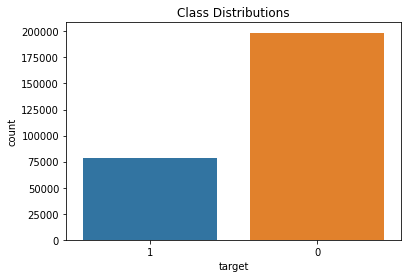

In [ ]:
sns.countplot(df_data['target']).set_title('Class Distributions')

# Divide the dataset into train,test and split

In [ ]:
#Split the dataset given to us into 3 sections train,test and valid
from sklearn.model_selection import train_test_split

y = df_data['target']

_, df_test = train_test_split(df_data, test_size=0.03603, random_state=42, stratify=y)

_, df_val = train_test_split(df_data, test_size=0.0036025, random_state=42, stratify=y)

print('Valid:', df_val.shape[0])
print('Test:', df_test.shape[0])

Valid: 1000
Test: 10000


In [ ]:
df_val.head()

image_id patient_id target
121626   12891_idx5_x1451_y851_class0.png      12891      0
194027    9043_idx5_x2351_y451_class0.png       9043      0
123961   12947_idx5_x2301_y301_class0.png      12947      0
21361   14154_idx5_x2201_y1701_class1.png      14154      1
56886    13694_idx5_x101_y2001_class0.png      13694      0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Valid Class Distributions')

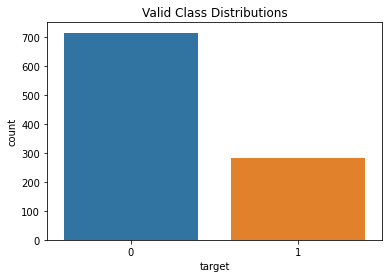

In [ ]:
#plot that shows the class distribution
sns.countplot(df_val['target']).set_title('Valid Class Distributions')

In [ ]:
df_test.head()

image_id patient_id target
132161    10288_idx5_x951_y901_class0.png      10288      0
175607    10303_idx5_x551_y601_class0.png      10303      0
120975   9123_idx5_x1751_y2401_class0.png       9123      0
40149    10292_idx5_x2001_y751_class0.png      10292      0
131004  10268_idx5_x2051_y1901_class0.png      10268      0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Test Class Distributions')

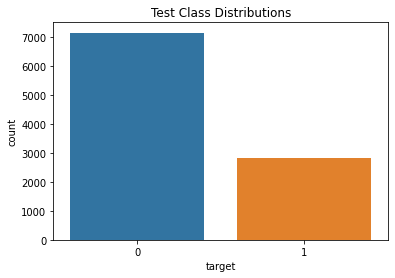

In [ ]:
sns.countplot(df_test['target']).set_title('Test Class Distributions')

In [ ]:
def identify_train_val_and_test_rows(x):
    # create a list of all the lesion_id's in the val set and test set
    val_list = list(df_val['image_id'])
    test_list = list(df_test['image_id'])
    
    if str(x) in val_list:
        return 'val'
    elif str(x) in test_list:
        return 'test'
    else:
        return 'train'

# create a new colum that is a copy of the image_id column
df_data['train_or_val_or_test'] = df_data['image_id']
# apply the function to this new column
df_data['train_or_val_or_test'] = df_data['train_or_val_or_test'].apply(identify_train_val_and_test_rows)
   
# filter out train rows
df_train = df_data[df_data['train_or_val_or_test'] == 'train']

print('Train:', len(df_train))
print('Valid:', len(df_val))
print('Test:', len(df_test))

Train: 267524
Valid: 1000
Test: 10000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Train Class Distributions')

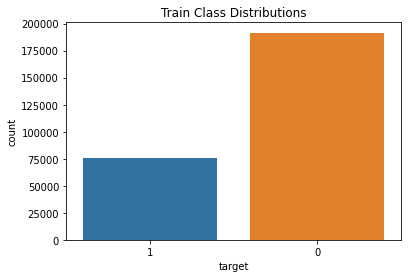

In [ ]:
sns.countplot(df_train['target']).set_title('Train Class Distributions')

In [ ]:
df_data.set_index('image_id', inplace=True)
df_data.head()

patient_id target train_or_val_or_test
image_id                                                                
9345_idx5_x2701_y1001_class1.png        9345      1                train
16553_idx5_x751_y1701_class1.png       16553      1                train
15634_idx5_x501_y1601_class1.png       15634      1                train
12878_idx5_x1851_y2301_class1.png      12878      1                train
16165_idx5_x2251_y2251_class1.png      16165      1                train

# Move train test and Validation Sets to their respective directory

1(IDC Positive Images)

0(IDC Negative Images)

In [ ]:
#train data
train_dir = os.path.join('train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join('val_dir')
os.mkdir(val_dir)

# test_dir
test_dir = os.path.join('test_dir')
os.mkdir(test_dir)


# Create folders within the train, valid, and test folders
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
os.mkdir(os.path.join(train_dir, '1'))
os.mkdir(os.path.join(train_dir, '0'))

# Create new folders inside val_dir
os.mkdir(os.path.join(val_dir, '1'))
os.mkdir(os.path.join(val_dir, '0'))

# Create new folders inside test_dir
os.mkdir(os.path.join(test_dir, '1'))
os.mkdir(os.path.join(test_dir, '0'))

In [ ]:
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])
test_list = list(df_test['image_id'])

# Transfer the train images

for image in train_list:
    
    pat_id = df_data.loc[image,'patient_id']
    label = df_data.loc[image,'target']
    src = pat_id + '/' + label + '/' + image
    
    # destination path to image
    dst = os.path.join(train_dir, label, image)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the val images

for image in val_list:
    
    pat_id = df_data.loc[image,'patient_id']
    label = df_data.loc[image,'target']
    src = pat_id + '/' + label + '/' + image
    
    # destination path to image
    dst = os.path.join(val_dir, label, image)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
# Transfer the test images
for image in test_list:
    
    pat_id = df_data.loc[image,'patient_id']
    label = df_data.loc[image,'target']
    src = pat_id + '/' + label + '/' + image
    
    # destination path to image
    dst = os.path.join(test_dir, label, image)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

In [ ]:
#print the number of images stored in train test and validation and their sub-directories
print('Train Total:', len(os.listdir('train_dir/1'))+len(os.listdir('train_dir/0')))
print('Valid Total:', len(os.listdir('val_dir/1'))+len(os.listdir('val_dir/0')))
print('Test Total:', len(os.listdir('test_dir/1'))+len(os.listdir('test_dir/0')), '\n')

print('Train Negative:', len(os.listdir('train_dir/0')))
print('Train Positive:', len(os.listdir('train_dir/1')), '\n')

print('Valid Negative:', len(os.listdir('val_dir/0')))
print('Valid Positive:', len(os.listdir('val_dir/1')), '\n')

print('Test Negative:', len(os.listdir('test_dir/0')))
print('Test Positive:', len(os.listdir('test_dir/1')))

Train Total: 267524
Valid Total: 1000
Test Total: 10000 

Train Negative: 191577
Train Positive: 75947 

Valid Negative: 716
Valid Positive: 284 

Test Negative: 7161
Test Positive: 2839


# Make Augumented Class IDC Positive

Zoom uaugumentation is added to the images which will increase the number of 
pixels in train  images 

Image data augumentation is mainly done on a particular dataset in order to increase the number of pixels that are present in a training dataset so as to improve the performance of a given dataset.

In [ ]:
image_size = 100

from keras.preprocessing.image import ImageDataGenerator

# create temporary directories here and delete these directories later
aug_dir = 'aug_dir'
os.mkdir(aug_dir)
# create a dir within the base dir to store images of the same class
img_dir = os.path.join(aug_dir, 'img_dir')
os.mkdir(img_dir)

# list all images in that directory
img_list = os.listdir('train_dir/1')

# copy images from the class all images directory to the image directory
for fname in img_list:
    # source path to image
    src = os.path.join('train_dir/1', fname)
    # destination path to image
    dst = os.path.join(img_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# point to a dir containing the images and not to the images themselves
path = 'aug_dir'
save_path = 'train_dir/1'

# create a data generator
datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.125,
    height_shift_range=0.125,
    zoom_range=[1.2, 1.325],#zoom the images present in the dataset into the dimensions that are mentioned in the data
    fill_mode='reflect')#reflect fill the area with the reflection of the image present

batch_size = 25

aug_datagen = datagen.flow_from_directory(path,
                                          save_to_dir=save_path,
                                          save_format='jpg',
                                          target_size=(image_size, image_size),
                                          batch_size=batch_size)

# generate the augmented images and add them to the folder of all images

num_aug_images_wanted = len(os.listdir('train_dir/0')) # total number of images wanted in each class

num_files = len(os.listdir(img_dir))
num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

for i in range(0, num_batches):
  next(aug_datagen)

# delete temporary directory with the raw image files
shutil.rmtree('aug_dir')

Found 75947 images belonging to 1 classes.


In [ ]:
print('Train Total:', len(os.listdir('train_dir/1'))+len(os.listdir('train_dir/0')))
print('Train Positive:', len(os.listdir('train_dir/1')))
print('Train Negative:', len(os.listdir('train_dir/0')))

Train Total: 383171
Train Positive: 191594
Train Negative: 191577


# Create Train/Test and Valid Batches



In [ ]:
train_path = 'train_dir'
valid_path = 'val_dir'
test_path = 'test_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)

train_batch_size = 500
val_batch_size = 500

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [ ]:
#prepare data for training in the given model
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_batches_bench = datagen.flow_from_directory(train_path, 
                                                  target_size=(image_size, image_size),
                                                  batch_size=train_batch_size)

valid_batches_bench = datagen.flow_from_directory(valid_path,  
                                                  target_size=(image_size, image_size),
                                                  batch_size=val_batch_size)

test_batches_bench = datagen.flow_from_directory(test_path,  
                                                 target_size=(image_size, image_size),
                                                 batch_size=1,
                                                 shuffle=False) # test dataset should not be shuffled

Found 383171 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


IDC negative


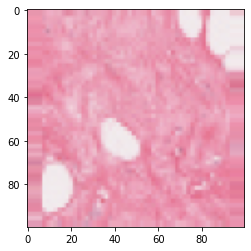

IDC positive


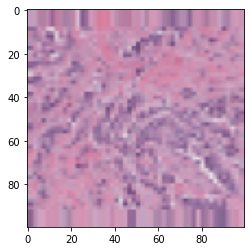

IDC negative


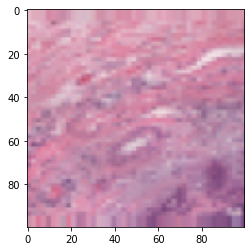

IDC positive


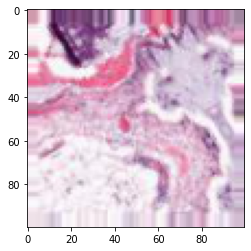

IDC positive


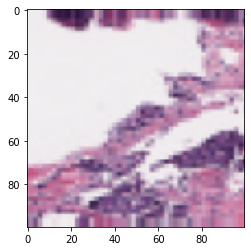

IDC positive


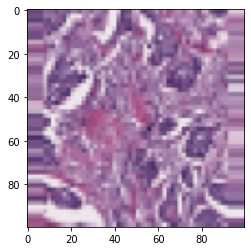

IDC positive


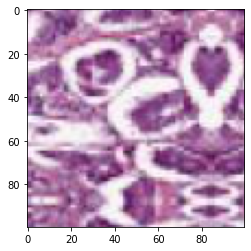

IDC positive


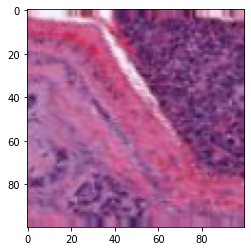

IDC negative


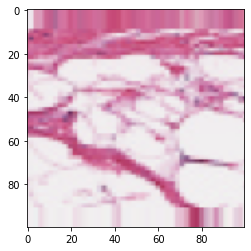

IDC negative


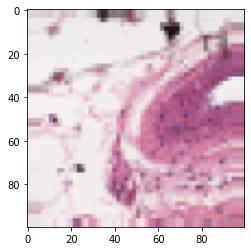

IDC negative


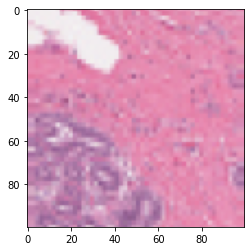

IDC positive


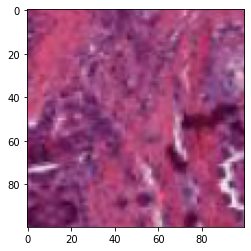

IDC positive


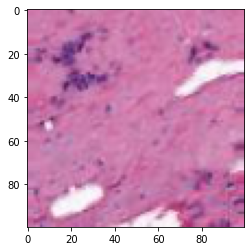

IDC negative


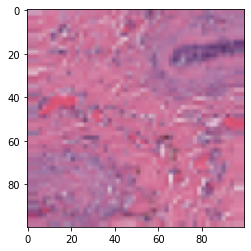

IDC negative


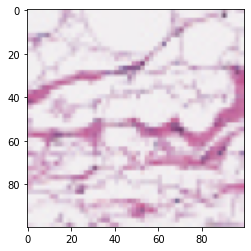

IDC positive


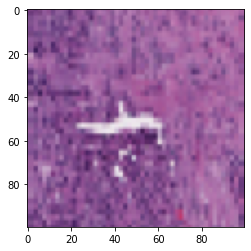

IDC positive


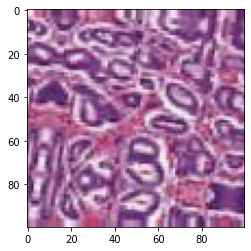

IDC negative


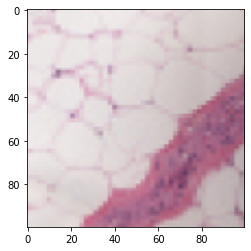

IDC positive


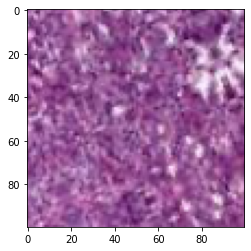

IDC negative


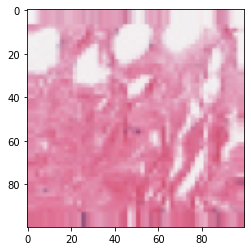

IDC positive


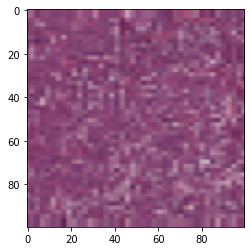

IDC negative


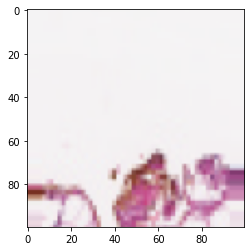

IDC negative


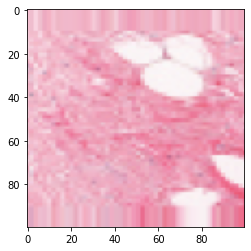

IDC negative


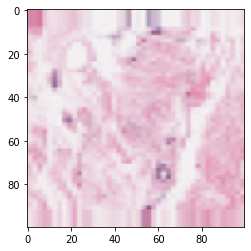

IDC negative


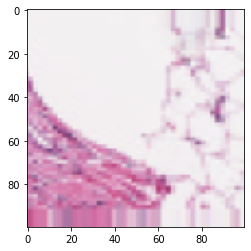

In [ ]:
#Show the imagespresent in the respective folders
x, y = train_batches_bench.next()
for i in range(0,25):
    image = x[i]
    label = y[i]
    if np.argmax(label, axis=0) == 0:
      print('IDC negative')
    if np.argmax(label, axis=0) == 1:
      print('IDC positive')
    plt.imshow(image)
    plt.show()

1. Build a simple 2D CNN model to classify the given dataset. Sequential Model that contains convolution,flatten and output layer


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, Activation, GlobalAveragePooling2D
from keras import regularizers
cnn = Sequential()#naming the model as cnn
cnn.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(image_size, image_size, 3)))#Convolution layer with 16 filters and size 3
cnn.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))# second convolution layer with 16 filters and size 3 
cnn.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))#third convolution layer which has 16 filters and kernel size 3 
cnn.add(MaxPooling2D(pool_size=2))# fourth layer is max pooling layer of size 2
cnn.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))# fifth layer Convolution with 32 filters and kernel size 3
cnn.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))# sixth layer which is a layer which has 32 filters and has kernel size 3 
cnn.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))# seventh layer is a convolution layer of 32 filters and kernel size 3
cnn.add(MaxPooling2D(pool_size=2))#eight layer is MaxPooling layer of size 2
cnn.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))#eight layer is has 64 filter and kernel size 3
cnn.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))# ninth layer is a layer with 64 filters and kernel size 3
cnn.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))# tenth layer is a convolution layer with 64 filters and kerne size 3
cnn.add(MaxPooling2D(pool_size=2))#eleventh layer is a max pooling layer of size 2
cnn.add(Dropout(0.35))#twelth layer with is a dropout layer
cnn.add(Flatten())# layer converted to vectors
cnn.add(Dense(256, activation='relu'))#dense layer with 256 neurons
cnn.add(Dropout(0.5))#dropout layer
cnn.add(Dense(2, activation='softmax'))#layer which has 2 neurons
cnn.summary()#model summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 16)      2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 32)        9

In [ ]:
#Compile the sequential model 
from keras import metrics
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#check pointer(Compile the model at every epoch to check whether there is improvement at every step)
from keras.callbacks import ModelCheckpoint
checkpointer_cnn = ModelCheckpoint(filepath='breast_histopathology_bench_best.hdf5', verbose=1, save_best_only=True)

# Train Model
history_cnn = cnn.fit_generator(train_batches_bench, 
                                            steps_per_epoch=100, 
                                            validation_data=valid_batches_bench,
                                            validation_steps=val_steps,
                                            callbacks=[checkpointer_cnn], 
                                            epochs=5, 
                                            verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 227s 2s/step - loss: 0.5829 - accuracy: 0.6778 - val_loss: 0.5324 - val_accuracy: 0.7160

Epoch 00001: val_loss improved from inf to 0.53244, saving model to breast_histopathology_bench_best.hdf5
Epoch 2/5
100/100 [==============================] - 186s 2s/step - loss: 0.4239 - accuracy: 0.8150 - val_loss: 0.4766 - val_accuracy: 0.7700

Epoch 00002: val_loss improved from 0.53244 to 0.47657, saving model to breast_histopathology_bench_best.hdf5
Epoch 3/5
100/100 [==============================] - 185s 2s/step - loss: 0.3901 - accuracy: 0.8263 - val_loss: 0.4503 - val_accuracy: 0.7950

Epoch 00003: val_loss improved from 0.47657 to 0.45031, saving model to breast_histopathology_bench_best.hdf5
Epoch 4/5
100/100 [==============================] - 181s 2s/step - loss: 0.3474 - accuracy: 0.8476 - val_loss: 0.4571 - val_accuracy: 0.7900

Epoch 00004: val_loss did not improve from 0.45031
Epoch 5/5
100/100 [==============================] 

In [ ]:
def plot_training(history):
  
    acc = history.history['accuracy'] 
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    
    plt.plot(epochs,acc, 'b')
    plt.plot(epochs,val_acc, 'r')
    plt.title("Training & Validation Accuracy")
    
    plt.figure()
    plt.plot(epochs, loss, 'b')
    plt.plot(epochs, val_loss, 'r')
    plt.title("Training & Validation Loss")
    
    plt.show()

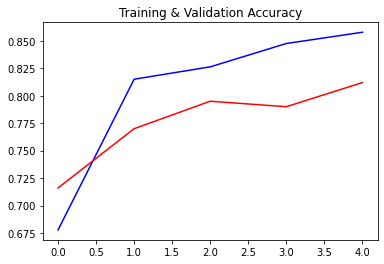

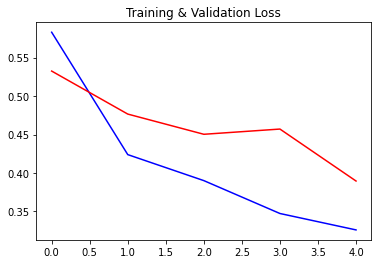

In [ ]:
plot_training(history_cnn)

In [ ]:
cnn.load_weights('breast_histopathology_bench_best.hdf5')# load and save the weights of the given model after training it

In [ ]:
preds = cnn.predict_generator(test_batches_bench, steps=len(df_test), verbose=1)# check how the model is detecting data in the test set

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


10000/10000 [==============================] - 59s 6ms/step


In [ ]:
y_pred = np.argmax(preds, axis=1)# gives maximum value of the target function

# Get labels of test images
y_true = test_batches_bench.classes

In [ ]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_true, y_pred):1.3f}%')#printing the accuracy score of the given model 

from sklearn.metrics import balanced_accuracy_score
print(f'Balanced Accuracy: {balanced_accuracy_score(y_true, y_pred):1.3f}%')
# Balanced accuracy is calculated as the average of the proportion correct of each class individually

Accuracy: 0.820%
Balanced Accuracy: 0.724%


In [ ]:
from sklearn.metrics import confusion_matrix

def matrix():
  conf_matrix = confusion_matrix(y_true, y_pred)
  plt.imshow(conf_matrix, interpolation='nearest', cmap='viridis')
  plt.title('Confusion matrix')
  plt.colorbar()
  tick_marks = np.arange(len(['negative', 'positive']))
  plt.xticks(tick_marks, ['negative', 'positive'])
  plt.yticks(tick_marks, ['negative', 'positive'])
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

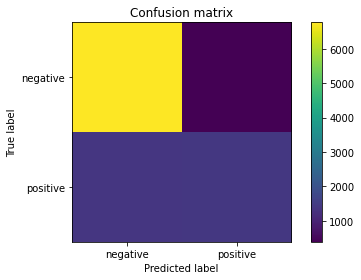

In [ ]:
matrix()

In [ ]:
confusionmatrix = confusion_matrix(y_true, y_pred)#creating the confusion matrix based on the description which is given above
confusionmatrix

array([[6769,  392],
       [1410, 1429]])

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true=y_true, y_pred=y_pred, target_names=['negative', 'positive'])#printing various measures that are shown in accuracy ie f1 score precision,recall and support
print(report)

              precision    recall  f1-score   support

    negative       0.83      0.95      0.88      7161
    positive       0.78      0.50      0.61      2839

    accuracy                           0.82     10000
   macro avg       0.81      0.72      0.75     10000
weighted avg       0.82      0.82      0.81     10000



IDC negative
Predicted Negative Probability: 99.98%
Predicted Positive Probability: 0.02%


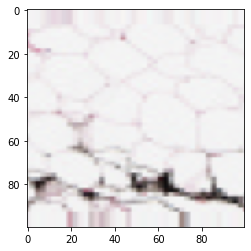

IDC negative
Predicted Negative Probability: 98.75%
Predicted Positive Probability: 1.25%


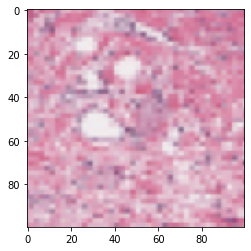

IDC negative
Predicted Negative Probability: 99.80%
Predicted Positive Probability: 0.20%


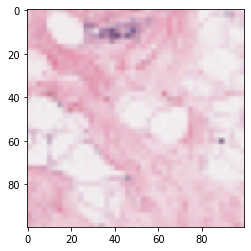

IDC negative
Predicted Negative Probability: 99.76%
Predicted Positive Probability: 0.24%


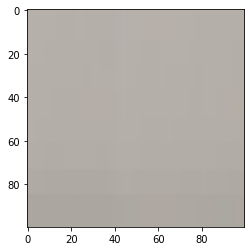

IDC negative
Predicted Negative Probability: 99.66%
Predicted Positive Probability: 0.34%


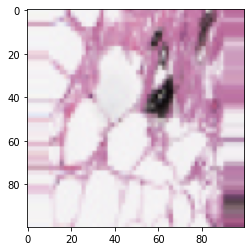

IDC positive
Predicted Negative Probability: 11.33%
Predicted Positive Probability: 88.67%


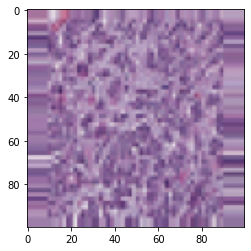

IDC negative
Predicted Negative Probability: 99.82%
Predicted Positive Probability: 0.18%


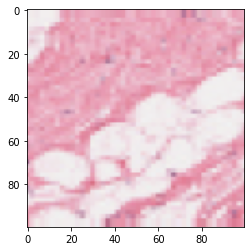

IDC negative
Predicted Negative Probability: 65.35%
Predicted Positive Probability: 34.65%


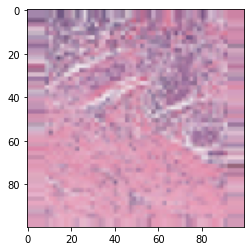

IDC negative
Predicted Negative Probability: 99.13%
Predicted Positive Probability: 0.87%


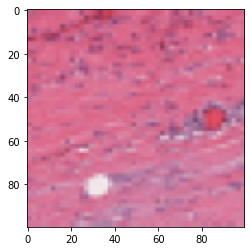

In [ ]:
#class activation maps
x, y = valid_batches_bench.next()

for i in range(1,10):
  
  image = x[i]
  label = y[i]
  
  if np.argmax(label, axis=0) == 0:
      print('IDC negative')
  if np.argmax(label, axis=0) == 1:
    print('IDC positive')

  prob = cnn.predict(image.reshape(1,100,100,3))
  for a in prob:
    for b in a:
      print(f'Predicted Negative Probability: {(b*100):1.2f}%')
      print(f'Predicted Positive Probability: {(1-b)*100:1.2f}%')
      break

  plt.imshow(image)
  plt.show()

In [ ]:
#get filters and biases
def get_name_layer_filters(model):
    filter_whole=[]
    layer_whole=[]
    for layer in model.layers:
        if 'conv' not in layer.name:
            continue
        filters,biases=layer.get_weights()
        filter_whole.append(filters)
        layer_whole.append(biases)
        print(layer.name, filters.shape)
    return filter_whole, layer_whole

In [ ]:
filter_whole, layer_whole = get_name_layer_filters(cnn)

conv2d (3, 3, 3, 16)
conv2d_1 (3, 3, 16, 16)
conv2d_2 (3, 3, 16, 16)
conv2d_3 (3, 3, 16, 32)
conv2d_4 (3, 3, 32, 32)
conv2d_5 (3, 3, 32, 32)
conv2d_6 (3, 3, 32, 64)
conv2d_7 (3, 3, 64, 64)
conv2d_8 (3, 3, 64, 64)


In [ ]:
# Output of 1st Convolutional Layer
cam_layer = cnn.layers[2]
filters, biases = cam_layer.get_weights()
print(filters.shape)
print(biases.shape)

(3, 3, 16, 16)
(16,)


In [ ]:
# Normalizing the filters
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

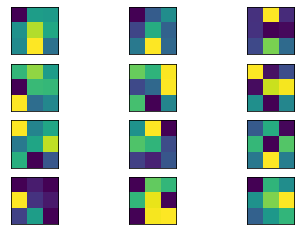

In [ ]:
# Plot the filters

n_filters = 4
ix = 1
for i in range(n_filters):
    f = filters[:,:,:,i]
    # Plot each channel
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Plot filter channel
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show()

In [ ]:
from keras.models import Model
model_feature = Model(inputs=cnn.inputs, outputs=cam_layer.output)

In [ ]:
x, y = valid_batches_bench.next()
test_label = y[123]
test_image = x[123]
test_image_np = np.expand_dims(test_image, axis=0)

IDC negative
Predicted Negative Probability: 99.60%
Predicted Positive Probability: 0.40%


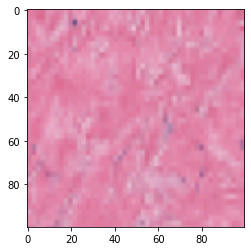

In [ ]:
plt.imshow(test_image)

if np.argmax(test_label, axis=0) == 0:
  print('IDC negative')
if np.argmax(test_label, axis=0) == 1:
  print('IDC positive')
  
prob = cnn.predict(test_image.reshape(1,100,100,3))
for a in prob:
  for b in a:
    print(f'Predicted Negative Probability: {(b*100):1.2f}%')
    print(f'Predicted Positive Probability: {(1-b)*100:1.2f}%')
    break

In [ ]:
feature_map = model_feature.predict(test_image_np)
feature_map.shape

(1, 100, 100, 16)

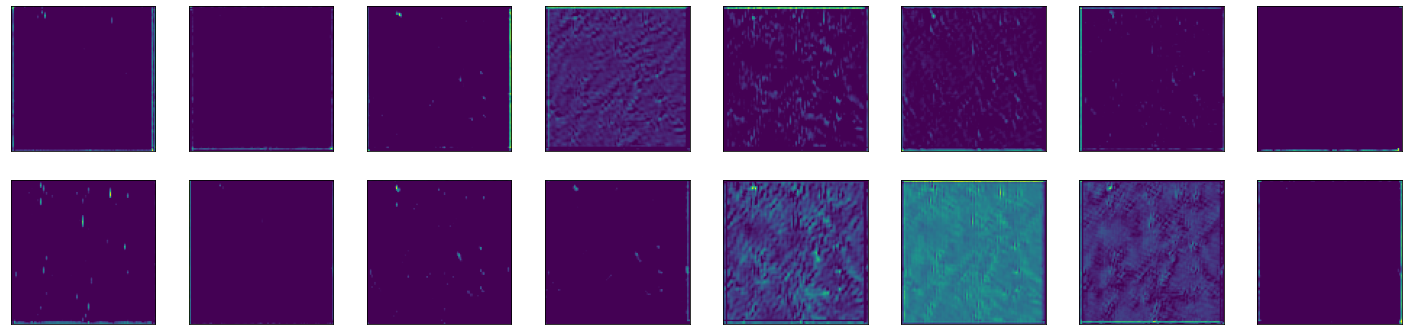

In [ ]:
#output of scond convolution layer
pyplot.figure(figsize=(25,25))        
        
square = 8
ix = 1
for _ in range(4):
  for _ in range(4):
      ax = pyplot.subplot(square, square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(feature_map[0,:,:,ix-1])
      ix += 1
        
pyplot.show()

In [ ]:
# Output of 2nd Convolutional Layer
cam_layer = cnn.layers[6]
filters, biases = cam_layer.get_weights()
print(filters.shape)
print(biases.shape)

(3, 3, 32, 32)
(32,)


In [ ]:
# Normalizing the filters
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

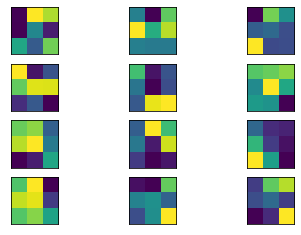

In [ ]:
# Plot the filters

n_filters = 4
ix = 1
for i in range(n_filters):
    f = filters[:,:,:,i]
    # Plot each channel
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Plot filter channel
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show()

In [ ]:
model_feature = Model(inputs=cnn.inputs, outputs=cam_layer.output)

In [ ]:
feature_map = model_feature.predict(test_image_np)
feature_map.shape

(1, 50, 50, 32)

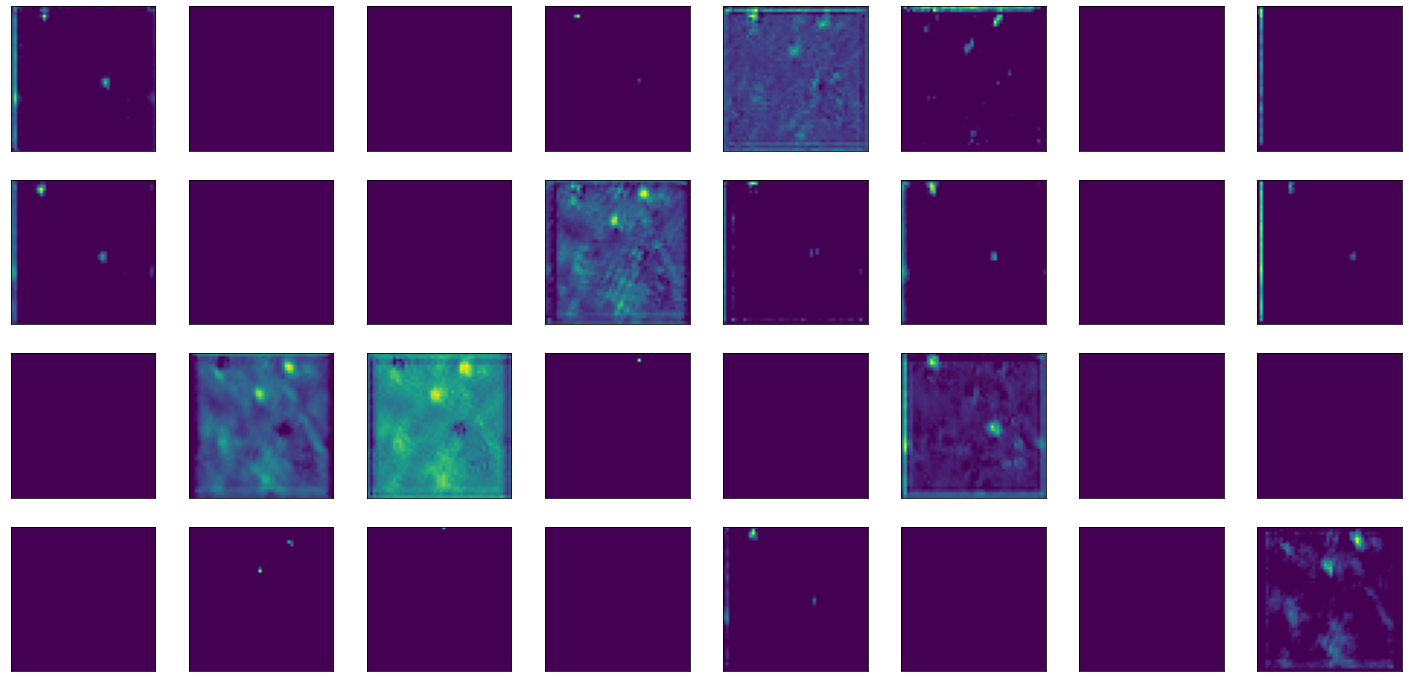

In [ ]:
pyplot.figure(figsize=(25,25))        
        
square = 8
ix = 1
for _ in range(4):
  for _ in range(8):
      ax = pyplot.subplot(square, square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(feature_map[0,:,:,ix-1])
      ix += 1
        
pyplot.show()

In [ ]:
# Output of 3rd Convolutional Layer
cam_layer = cnn.layers[10]
filters, biases = cam_layer.get_weights()
print(filters.shape)
print(biases.shape)

(3, 3, 64, 64)
(64,)


In [ ]:
# Normalizing the filters
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

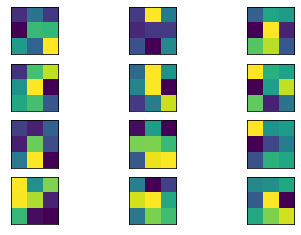

In [ ]:
# Plot the filters

n_filters = 4
ix = 1
for i in range(n_filters):
    f = filters[:,:,:,i]
    # Plot each channel
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Plot filter channel
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show()

In [ ]:
model_feature = Model(inputs=cnn.inputs, outputs=cam_layer.output)

In [ ]:
feature_map = model_feature.predict(test_image_np)
feature_map.shape

(1, 25, 25, 64)

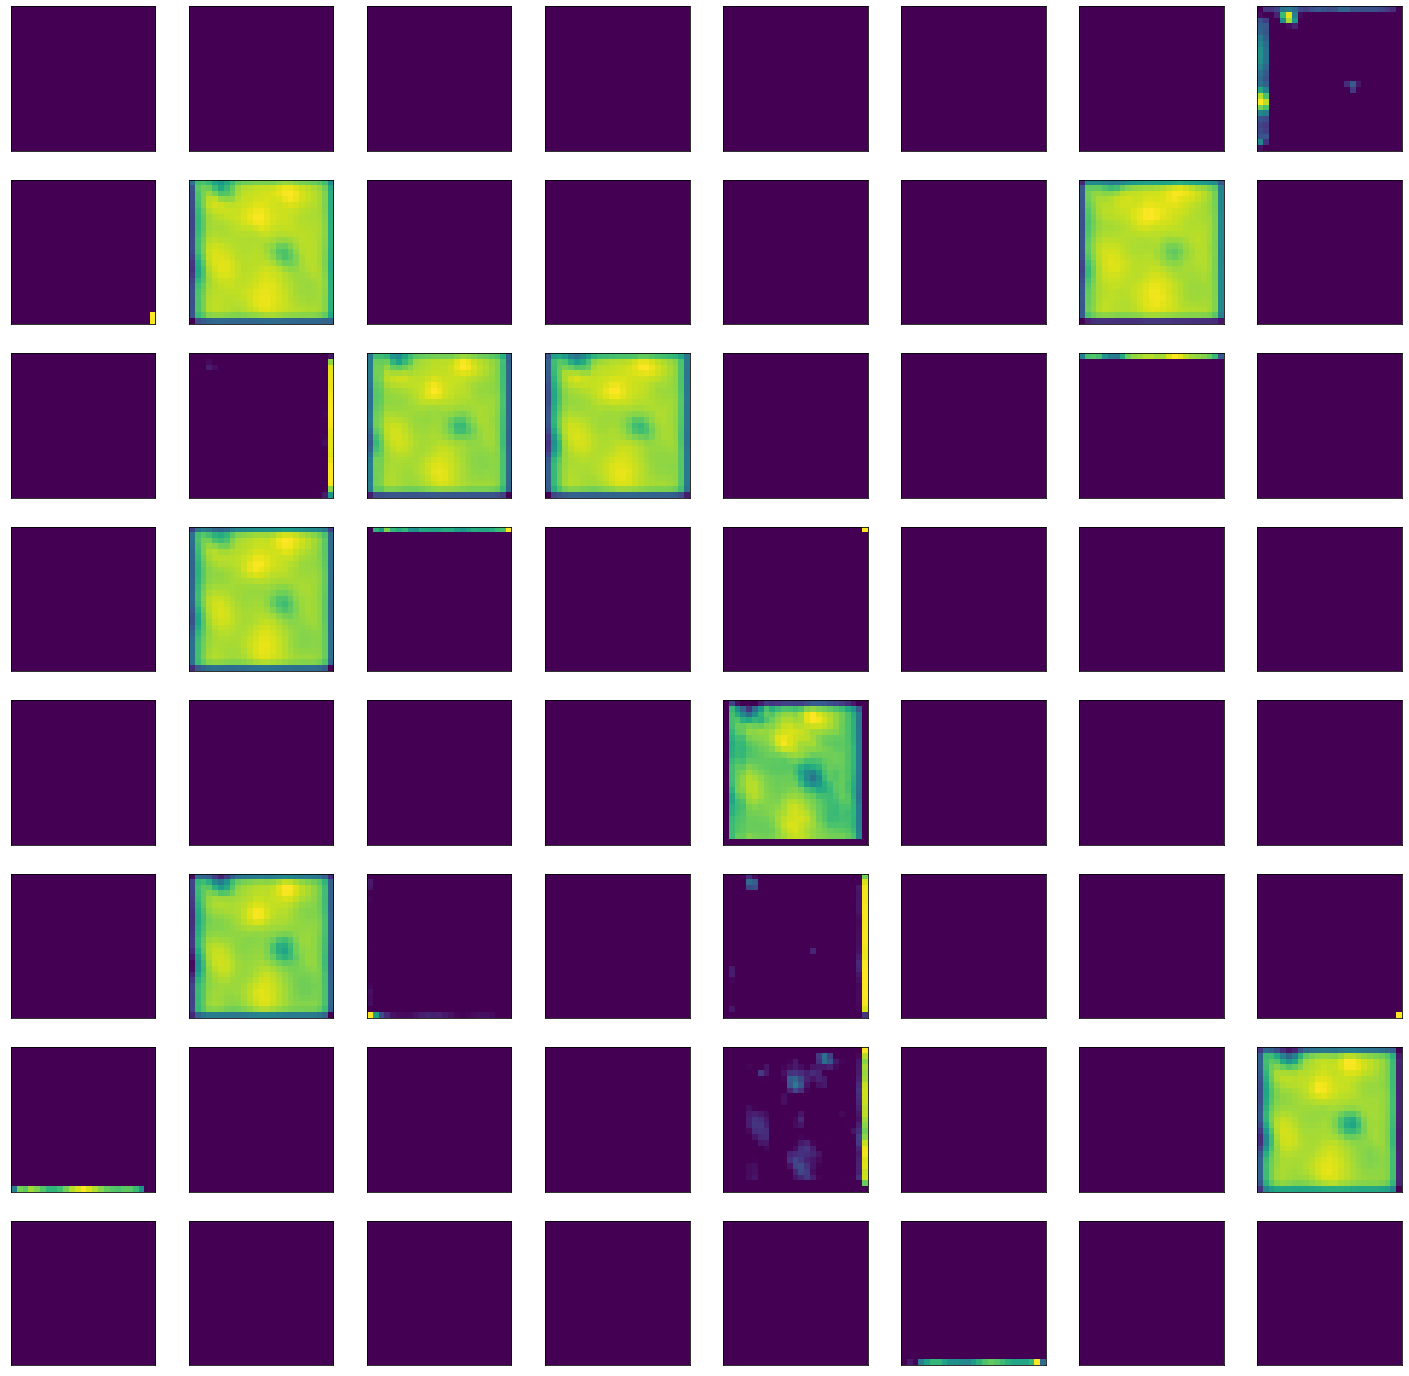

In [ ]:
pyplot.figure(figsize=(25,25))        
        
square = 8
ix = 1
for _ in range(8):
  for _ in range(8):
      ax = pyplot.subplot(square, square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(feature_map[0,:,:,ix-1])
      ix += 1
        
pyplot.show()

# Modify the 2D CNN architecture designed in (1) with the concept of 1 x 1 convolution.

A 1x1 convolution simply maps an input pixel with all it's channels to an output pixel, not looking at anything around itself.

 It is often used to reduce the number of depth channels, since it is often very slow to multiply volumes with extremely large depths.

 Hence in this step we have updated cnn model by adding a 1*1 convolution layer in it .

 The observation made was that this layer happened to make the model faster and it took much longer time for training the model

 Such kind of layer is observed in GoogleNet model

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, Activation, GlobalAveragePooling2D
from keras import regularizers

model = Sequential()#name of the sequential model is model
model.add(Conv2D(16, kernel_size=1, activation='relu', padding='same', input_shape=(image_size, image_size, 3)))#first convolution which has 16 filters and with kernel size1 
model.add(Conv2D(16, kernel_size=1, activation='relu', padding='same'))#second convolution layer has kernel size 1 and 16 filters
model.add(Conv2D(16, kernel_size=1, activation='relu', padding='same'))#third convolution layer has kernel size 1 and 16 filters
model.add(MaxPooling2D(pool_size=2))#fourth convolution layer is max-pooling with size 2
model.add(Conv2D(32, kernel_size=1, activation='relu', padding='same'))#fifth convolution layer with 32 filters and kernel size 1
model.add(Conv2D(32, kernel_size=1, activation='relu', padding='same'))#sixth convolution layer with 32 filters and kernel size 1
model.add(Conv2D(32, kernel_size=1, activation='relu', padding='same'))#seventh convolution layer with 32 filters and kernel size 1
model.add(MaxPooling2D(pool_size=2))#eighth convolution layer is a maxpooling layer with size 2
model.add(Conv2D(64, kernel_size=1, activation='relu', padding='same'))#ninth layer is a convolution layer with 64 filters and kernel size 1
model.add(Conv2D(64, kernel_size=1, activation='relu', padding='same'))#tenth layer is a convolution layer with 64 filters and kernel size 1
model.add(Conv2D(64, kernel_size=1, activation='relu', padding='same'))#eleventh layer is a convolution layer with 64 filters and kernel size 1
model.add(MaxPooling2D(pool_size=2))#twelth layer is a convolution layer with maxpooling size 2
model.add(Dropout(0.35))#thirteenth layer is a dropout layer
model.add(Flatten())#convert the layer in the vector form
model.add(Dense(256, activation='relu'))#Dense layer with 256 neurons
model.add(Dropout(0.5))#dropout layer
model.add(Dense(2, activation='softmax'))#dense layer with softmax activation function
model.summary()#summary

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 100, 100, 16)      64        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 100, 100, 16)      272       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 100, 100, 16)      272       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 50, 50, 32)        544       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 32)        1056      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 50, 32)       

In [ ]:
#compile the given model
from keras import metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#model checkpoint which checks whether the model is improving at every epoch to find at which epoch can we stop
from keras.callbacks import ModelCheckpoint
checkpointer_model = ModelCheckpoint(filepath='breast_histopathology_bench_best.hdf5', verbose=1, save_best_only=True)

# Train Model
history_benchmark = model.fit_generator(train_batches_bench, 
                                            steps_per_epoch=100, 

                                            validation_data=valid_batches_bench,
                                            validation_steps=val_steps,
                                            callbacks=[checkpointer_model], 
                                            epochs= 5, 
                                            verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 181s 2s/step - loss: 0.4978 - accuracy: 0.7606 - val_loss: 0.3967 - val_accuracy: 0.8090

Epoch 00001: val_loss improved from inf to 0.39667, saving model to breast_histopathology_bench_best.hdf5
Epoch 2/5
100/100 [==============================] - 176s 2s/step - loss: 0.3864 - accuracy: 0.8274 - val_loss: 0.4366 - val_accuracy: 0.7850

Epoch 00002: val_loss did not improve from 0.39667
Epoch 3/5
100/100 [==============================] - 174s 2s/step - loss: 0.3391 - accuracy: 0.8504 - val_loss: 0.3689 - val_accuracy: 0.8350

Epoch 00003: val_loss improved from 0.39667 to 0.36889, saving model to breast_histopathology_bench_best.hdf5
Epoch 4/5
100/100 [==============================] - 171s 2s/step - loss: 0.3069 - accuracy: 0.8669 - val_loss: 0.3541 - val_accuracy: 0.8410

Epoch 00004: val_loss improved from 0.36889 to 0.35409, saving model to breast_histopathology_bench_best.hdf5
Epoch 5/5
100/100 [==============================] 

In [ ]:
#plot the accuracy graph to check improvements of the model at every epoch both training as well as validation accuracy
def plot_training(history):
  
    acc = history.history['accuracy'] 
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    
    plt.plot(epochs,acc, 'b')
    plt.plot(epochs,val_acc, 'r')
    plt.title("Training & Validation Accuracy")
    
    plt.figure()
    plt.plot(epochs, loss, 'b')
    plt.plot(epochs, val_loss, 'r')
    plt.title("Training & Validation Loss")
    
    plt.show()

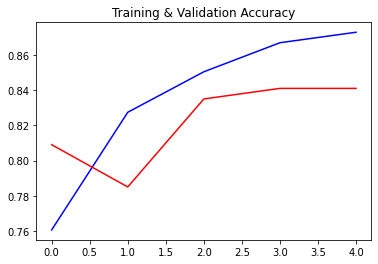

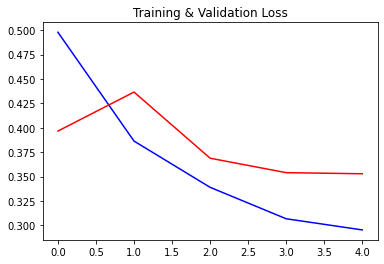

In [ ]:
plot_training(history_benchmark)

In [ ]:
#Store the weights of the model described above if needed in future
model.load_weights('breast_histopathology_bench_best.hdf5')

In [ ]:
#check whether the model is working for the given set of predictions
preds = model.predict_generator(test_batches_bench, steps=len(df_test), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


10000/10000 [==============================] - 54s 5ms/step


In [ ]:
#print highest and most probable value
y_pred = np.argmax(preds, axis=1)
# Get labels of test images
y_true = test_batches_bench.classes

In [ ]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_true, y_pred):1.3f}%')#calculate accuracy of the given model
# Balanced accuracy is calculated as the average of the proportion correct of each class individually
from sklearn.metrics import balanced_accuracy_score 
print(f'Balanced Accuracy: {balanced_accuracy_score(y_true, y_pred):1.3f}%')

Accuracy: 0.848%
Balanced Accuracy: 0.794%


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

def matrix():
  conf_matrix = confusion_matrix(y_true, y_pred)
  plt.imshow(conf_matrix, interpolation='nearest', cmap='viridis')
  plt.title('Confusion matrix')
  plt.colorbar()
  tick_marks = np.arange(len(['negative', 'positive']))
  plt.xticks(tick_marks, ['negative', 'positive'])
  plt.yticks(tick_marks, ['negative', 'positive'])
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

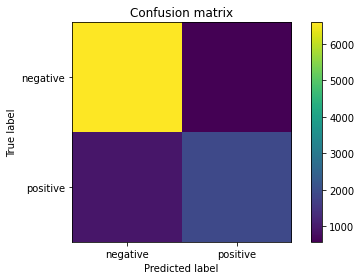

In [ ]:
matrix()

In [ ]:
confusionmatrix = confusion_matrix(y_true, y_pred)
confusionmatrix

array([[6585,  576],
       [ 942, 1897]])

In [ ]:
#accuracy scores and measures of a particular dataset
from sklearn.metrics import classification_report
report = classification_report(y_true=y_true, y_pred=y_pred, target_names=['negative', 'positive'])
print(report)

              precision    recall  f1-score   support

    negative       0.87      0.92      0.90      7161
    positive       0.77      0.67      0.71      2839

    accuracy                           0.85     10000
   macro avg       0.82      0.79      0.81     10000
weighted avg       0.84      0.85      0.84     10000



IDC negative
Predicted Negative Probability: 99.99%
Predicted Positive Probability: 0.01%


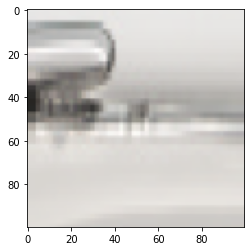

IDC negative
Predicted Negative Probability: 99.95%
Predicted Positive Probability: 0.05%


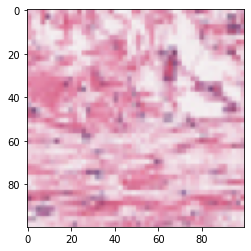

IDC positive
Predicted Negative Probability: 37.45%
Predicted Positive Probability: 62.55%


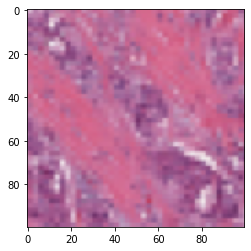

IDC negative
Predicted Negative Probability: 99.89%
Predicted Positive Probability: 0.11%


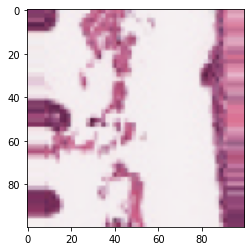

IDC positive
Predicted Negative Probability: 67.07%
Predicted Positive Probability: 32.93%


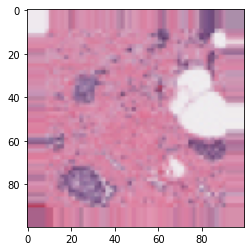

IDC positive
Predicted Negative Probability: 1.82%
Predicted Positive Probability: 98.18%


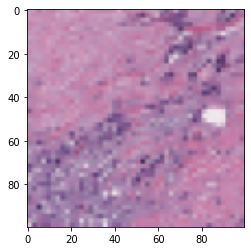

IDC negative
Predicted Negative Probability: 99.99%
Predicted Positive Probability: 0.01%


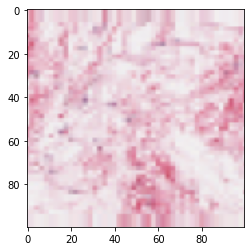

IDC positive
Predicted Negative Probability: 4.25%
Predicted Positive Probability: 95.75%


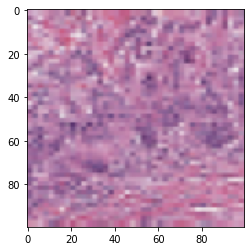

IDC negative
Predicted Negative Probability: 0.64%
Predicted Positive Probability: 99.36%


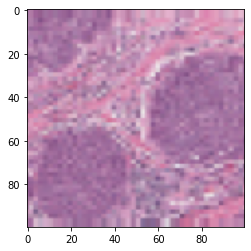

In [ ]:
#get filters and biases
x, y = valid_batches_bench.next()

for i in range(1,10):
  
  image = x[i]
  label = y[i]
  
  if np.argmax(label, axis=0) == 0:
      print('IDC negative')
  if np.argmax(label, axis=0) == 1:
    print('IDC positive')

  prob = model.predict(image.reshape(1,100,100,3))
  for a in prob:
    for b in a:
      print(f'Predicted Negative Probability: {(b*100):1.2f}%')
      print(f'Predicted Positive Probability: {(1-b)*100:1.2f}%')
      break

  plt.imshow(image)
  plt.show()

In [ ]:
def get_name_layer_filters(model):
    filter_whole=[]
    layer_whole=[]
    for layer in model.layers:
        if 'conv' not in layer.name:
            continue
        filters,biases=layer.get_weights()
        filter_whole.append(filters)
        layer_whole.append(biases)
        print(layer.name, filters.shape)
    return filter_whole, layer_whole

In [ ]:
filter_whole, layer_whole = get_name_layer_filters(model)

conv2d_9 (1, 1, 3, 16)
conv2d_10 (1, 1, 16, 16)
conv2d_11 (1, 1, 16, 16)
conv2d_12 (1, 1, 16, 32)
conv2d_13 (1, 1, 32, 32)
conv2d_14 (1, 1, 32, 32)
conv2d_15 (1, 1, 32, 64)
conv2d_16 (1, 1, 64, 64)
conv2d_17 (1, 1, 64, 64)


In [ ]:
# Output of 1st Convolutional Layer
cam_layer = model.layers[2]
filters, biases = cam_layer.get_weights()
print(filters.shape)
print(biases.shape)

(1, 1, 16, 16)
(16,)


In [ ]:
# Normalizing the filters
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

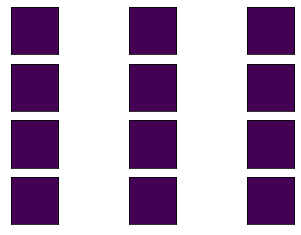

In [ ]:
# Plot the filters

n_filters = 4
ix = 1
for i in range(n_filters):
    f = filters[:,:,:,i]
    # Plot each channel
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Plot filter channel
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show()

In [ ]:
from keras.models import Model
model_feature = Model(inputs=model.inputs, outputs=cam_layer.output)

In [ ]:
x, y = valid_batches_bench.next()
test_label = y[123]
test_image = x[123]
test_image_np = np.expand_dims(test_image, axis=0)

IDC negative
Predicted Negative Probability: 99.84%
Predicted Positive Probability: 0.16%


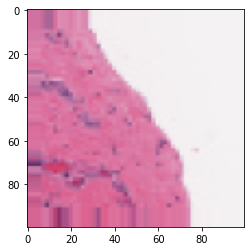

In [ ]:
plt.imshow(test_image)

if np.argmax(test_label, axis=0) == 0:
  print('IDC negative')
if np.argmax(test_label, axis=0) == 1:
  print('IDC positive')
  
prob = model.predict(test_image.reshape(1,100,100,3))
for a in prob:
  for b in a:
    print(f'Predicted Negative Probability: {(b*100):1.2f}%')
    print(f'Predicted Positive Probability: {(1-b)*100:1.2f}%')
    break

In [ ]:
feature_map = model_feature.predict(test_image_np)
feature_map.shape

(1, 100, 100, 16)

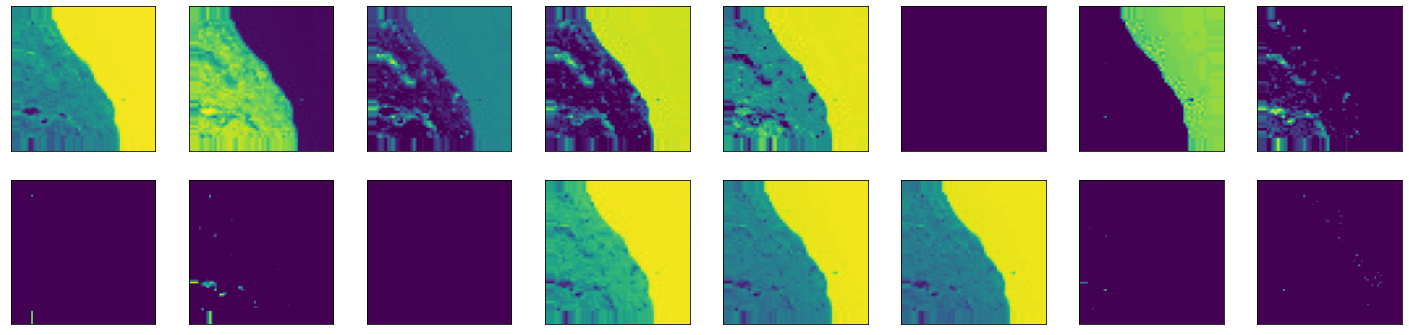

In [ ]:
#ploting figure of the given figure
pyplot.figure(figsize=(25,25))        
        
square = 8
ix = 1
for _ in range(4):
  for _ in range(4):
      ax = pyplot.subplot(square, square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(feature_map[0,:,:,ix-1])
      ix += 1
        
pyplot.show()

In [ ]:
# Output of 2nd Convolutional Layer
cam_layer = cnn.layers[6]
filters, biases = cam_layer.get_weights()
print(filters.shape)
print(biases.shape)

(3, 3, 32, 32)
(32,)


In [ ]:
# Normalizing the filters
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/(f_max-f_min)

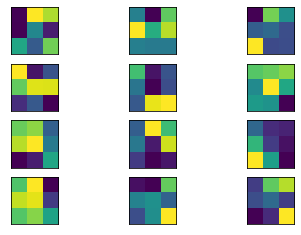

In [ ]:
# Plot the filters

n_filters = 4
ix = 1
for i in range(n_filters):
    f = filters[:,:,:,i]
    # Plot each channel
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Plot filter channel
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show()

In [ ]:
feature_map = model_feature.predict(test_image_np)
feature_map.shape

(1, 100, 100, 16)

# 4. Use the Inception model and apply the concept of transfer learning to classify the given dataset.
**Transfer learning**
Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.

For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks. 

This area of research bears some relation to the long history of psychological literature on transfer of learning, although practical ties between the two fields are limited. 

From the practical standpoint, reusing or transferring information from previously learned tasks for the learning of new tasks has the potential to significantly improve the sample efficiency of a reinforcement learning agent.

Transfer learning method is mainly used in situations where the amount of data is less for training. We use different pretrained model to carry out this operation.

# Inception Model
Inception has proved to be more efficient when we compare it with thed vgg model and inception

In [ ]:
# build the transfer learning model of the given dataset
# set base model as inceptionV3 and build the given model
from keras.applications.inception_v3 import InceptionV3
base = InceptionV3(include_top=False, weights='imagenet', pooling=None, input_shape=(image_size, image_size, 3))

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
#build model for transfer learning
from keras.models import Model

last = base.output
x = GlobalAveragePooling2D()(last)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(2, activation='softmax')(x)

transfer = Model(base.input, preds)
transfer.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 49, 49, 32)   96          conv2d_18[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 49, 49, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [ ]:
#load weights of inceptionNet model in the given dataset
base.load_weights('breast_histopathology_bench_best.hdf5', by_name=True)

In [ ]:
#number of layers present in inception model
print(len(base.layers))

311


In [ ]:
#freeze the given set of layers 
for layer in base.layers:
    layer.trainable = False

In [ ]:
#combine the given model
from keras import metrics
transfer.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(preprocessing_function=keras.applications.inception_v3.preprocess_input,
                             horizontal_flip=True,
                             vertical_flip=True, 
                             fill_mode='nearest')

train_batches_transfer = datagen.flow_from_directory(train_path,
                                                     target_size=(image_size, image_size),
                                                     batch_size=train_batch_size)

valid_batches_transfer = datagen.flow_from_directory(valid_path,
                                                     target_size=(image_size, image_size),
                                                     batch_size=val_batch_size)

test_batches_transfer = datagen.flow_from_directory(test_path,
                                                    target_size=(image_size, image_size),
                                                    batch_size=1,
                                                    shuffle=False) # test dataset should not be shuffled

Found 383171 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [ ]:
checkpointer_transfer = ModelCheckpoint(filepath='breast_histopathology_transfer_best.hdf5', verbose=1, save_best_only=True)

# Train Model
history_transfer = transfer.fit_generator(train_batches_transfer, 
                                       steps_per_epoch=100, 
                                       validation_data=valid_batches_transfer,
                                       validation_steps=val_steps,
                                       callbacks=[checkpointer_transfer], 
                                       epochs=5, 
                                       verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 61s 500ms/step - loss: 0.4271 - accuracy: 0.8170 - val_loss: 0.4548 - val_accuracy: 0.8010

Epoch 00001: val_loss improved from inf to 0.45475, saving model to breast_histopathology_transfer_best.hdf5
Epoch 2/5
100/100 [==============================] - 47s 472ms/step - loss: 0.3597 - accuracy: 0.8451 - val_loss: 0.4163 - val_accuracy: 0.8160

Epoch 00002: val_loss improved from 0.45475 to 0.41631, saving model to breast_histopathology_transfer_best.hdf5
Epoch 3/5
100/100 [==============================] - 47s 467ms/step - loss: 0.3461 - accuracy: 0.8504 - val_loss: 0.3978 - val_accuracy: 0.8260

Epoch 00003: val_loss improved from 0.41631 to 0.39780, saving model to breast_histopathology_transfer_best.hdf5
Epoch 4/5
100/100 [==============================] - 46s 457ms/step - loss: 0.3449 - accuracy: 0.8496 - val_loss: 0.4056 - val_accuracy: 0.8300

Epoch 00004: val_loss did not improve from 0.39780
Epoch 5/5
100/100 [===============

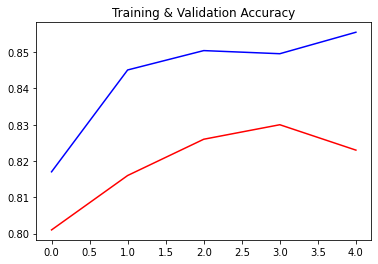

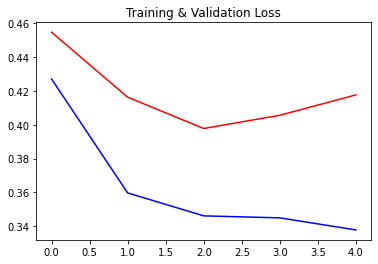

In [ ]:
plot_training(history_transfer)

In [ ]:
# Load Weights of the Transfer Learning Model
transfer.load_weights('breast_histopathology_transfer_best.hdf5')

In [ ]:
preds = transfer.predict_generator(test_batches_transfer, steps=len(df_test), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


10000/10000 [==============================] - 220s 22ms/step


In [ ]:
y_pred = np.argmax(preds, axis=1)

# Get labels of test images
y_true = test_batches_transfer.classes

In [ ]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_true, y_pred):1.3f}%')

from sklearn.metrics import balanced_accuracy_score
print(f'Balanced Accuracy: {balanced_accuracy_score(y_true, y_pred):1.3f}%')
# Balanced accuracy is calculated as the average of the proportion correct of each class individually

Accuracy: 0.820%
Balanced Accuracy: 0.770%


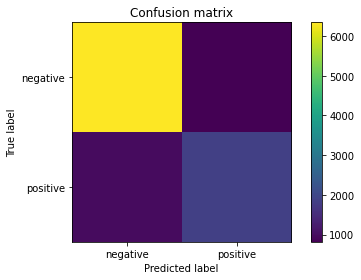

In [ ]:
matrix()

In [ ]:
confusionmatrix = confusion_matrix(y_true, y_pred)
confusionmatrix

array([[6344,  817],
       [ 983, 1856]])

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true=y_true, y_pred=y_pred, target_names=['negative', 'positive'])
print(report)

              precision    recall  f1-score   support

    negative       0.87      0.89      0.88      7161
    positive       0.69      0.65      0.67      2839

    accuracy                           0.82     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.82      0.82      0.82     10000



IDC positive
Prob Negative: 11.71%
Prob Positive 88.29%


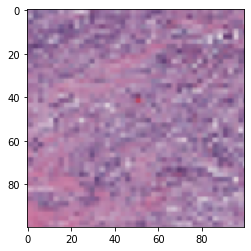

IDC negative
Prob Negative: 15.37%
Prob Positive 84.63%


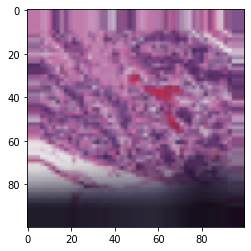

IDC positive
Prob Negative: 1.47%
Prob Positive 98.53%


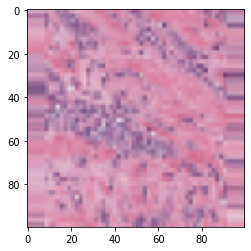

IDC negative
Prob Negative: 98.60%
Prob Positive 1.40%


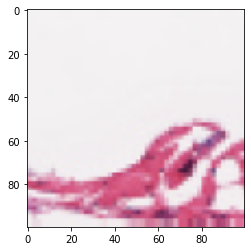

IDC negative
Prob Negative: 93.39%
Prob Positive 6.61%


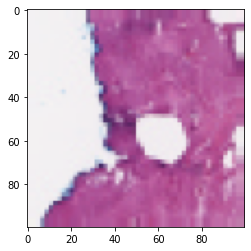

IDC negative
Prob Negative: 91.87%
Prob Positive 8.13%


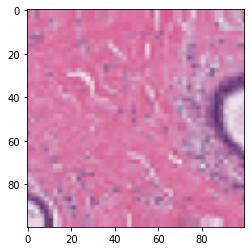

IDC negative
Prob Negative: 12.89%
Prob Positive 87.11%


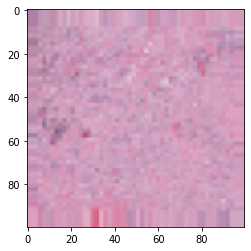

IDC positive
Prob Negative: 86.85%
Prob Positive 13.15%


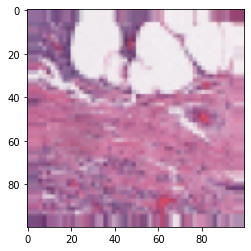

IDC positive
Prob Negative: 16.38%
Prob Positive 83.62%


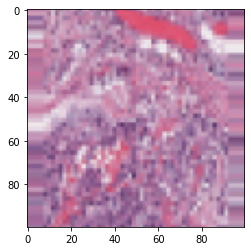

In [ ]:
x, y = valid_batches_bench.next()

for i in range(1,10):
  
  image = x[i]
  label = y[i]
  
  for j in label:
    if j == 1:
      print('IDC negative')
      break
    if j+1 == 1:
      print('IDC positive')
      break
    else:
      break

  prob = transfer.predict(image.reshape(1,100,100,3))
  for a in prob:
    for b in a:
      print(f'Prob Negative: {(b*100):1.2f}%')
      print(f'Prob Positive {(1-b)*100:1.2f}%')
      break

  plt.imshow(image)
  plt.show()

3. Use the VGG model and apply the concept of transfer learning to classify the given dataset.


# Vgg 19 Model
VGG-19 is a convolutional neural network that is 19 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database . 

In [ ]:
from keras.applications.vgg16 import VGG16
vgg_conv = VGG16()#build the vgg19 model


553476096/553467096 [==============================] - 7s 0us/step


In [ ]:
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer.name, layer.trainable)

58900480/58889256 [==============================] - 1s 0us/step
input_3 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              4719616   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 2050      
Total params: 19,436,354
Trainable params: 4,721,666
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from keras import metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(preprocessing_function=keras.applications.inception_v3.preprocess_input,
                             horizontal_flip=True,
                             vertical_flip=True, 
                             fill_mode='nearest')

train_batches_transfer = datagen.flow_from_directory(train_path,
                                                     target_size=(image_size, image_size),
                                                     batch_size=train_batch_size)

valid_batches_transfer = datagen.flow_from_directory(valid_path,
                                                     target_size=(image_size, image_size),
                                                     batch_size=val_batch_size)

test_batches_transfer = datagen.flow_from_directory(test_path,
                                                    target_size=(image_size, image_size),
                                                    batch_size=1,
                                                    shuffle=False) # test dataset should not be shuffled

Found 383171 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [ ]:
checkpointer_model = ModelCheckpoint(filepath='breast_histopathology_transfer_best.hdf5', verbose=1, save_best_only=True)

# Train Model
history_transfer = model.fit_generator(train_batches_transfer, 
                                       steps_per_epoch=100, 
                                       validation_data=valid_batches_transfer,
                                       validation_steps=val_steps,
                                       callbacks=[checkpointer_transfer], 
                                       epochs=5, 
                                       verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 128s 986ms/step - loss: 0.4347 - accuracy: 0.8242 - val_loss: 0.3859 - val_accuracy: 0.8310

Epoch 00001: val_loss improved from 0.39780 to 0.38586, saving model to breast_histopathology_transfer_best.hdf5
Epoch 2/5
100/100 [==============================] - 99s 982ms/step - loss: 0.3383 - accuracy: 0.8525 - val_loss: 0.3707 - val_accuracy: 0.8300

Epoch 00002: val_loss improved from 0.38586 to 0.37071, saving model to breast_histopathology_transfer_best.hdf5
Epoch 3/5
100/100 [==============================] - 99s 983ms/step - loss: 0.3283 - accuracy: 0.8561 - val_loss: 0.4020 - val_accuracy: 0.8180

Epoch 00003: val_loss did not improve from 0.37071
Epoch 4/5
100/100 [==============================] - 99s 984ms/step - loss: 0.3164 - accuracy: 0.8634 - val_loss: 0.3857 - val_accuracy: 0.8280

Epoch 00004: val_loss did not improve from 0.37071
Epoch 5/5
100/100 [==============================] - 99s 983ms/step - loss: 0.3156 - accura

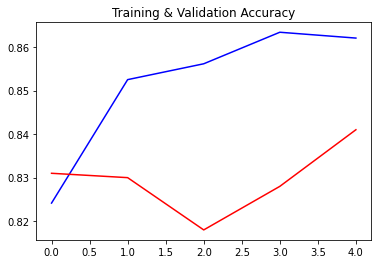

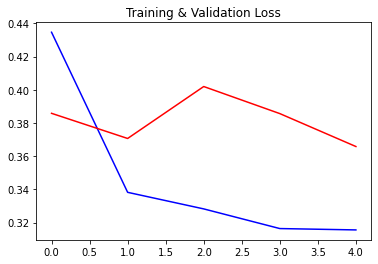

In [ ]:
plot_training(history_transfer)

In [ ]:
model.load_weights('breast_histopathology_transfer_best.hdf5')

In [ ]:
preds = model.predict_generator(test_batches_transfer, steps=len(df_test), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


10000/10000 [==============================] - 126s 13ms/step


In [ ]:
y_pred = np.argmax(preds, axis=1)

# Get labels of test images
y_true = test_batches_transfer.classes

In [ ]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_true, y_pred):1.3f}%')

from sklearn.metrics import balanced_accuracy_score
print(f'Balanced Accuracy: {balanced_accuracy_score(y_true, y_pred):1.3f}%')
# Balanced accuracy is calculated as the average of the proportion correct of each class individually

Accuracy: 0.840%
Balanced Accuracy: 0.804%


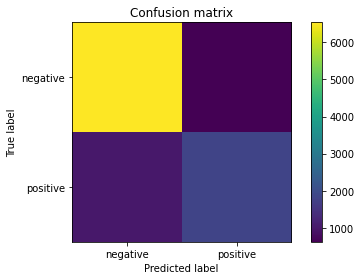

In [ ]:
matrix()

In [ ]:
confusionmatrix = confusion_matrix(y_true, y_pred)
confusionmatrix

array([[6353,  808],
       [ 794, 2045]])

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true=y_true, y_pred=y_pred, target_names=['negative', 'positive'])
print(report)

              precision    recall  f1-score   support

    negative       0.89      0.89      0.89      7161
    positive       0.72      0.72      0.72      2839

    accuracy                           0.84     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.84      0.84      0.84     10000



IDC negative
Prob Negative: 90.66%
Prob Positive 9.34%


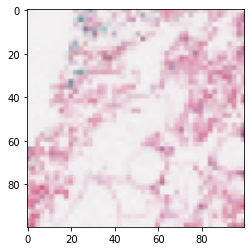

IDC negative
Prob Negative: 99.80%
Prob Positive 0.20%


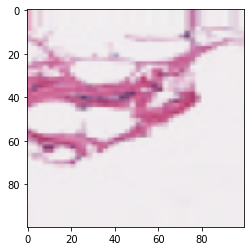

IDC negative
Prob Negative: 97.61%
Prob Positive 2.39%


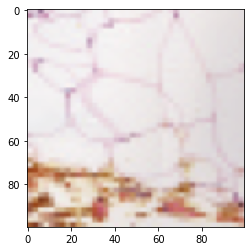

IDC negative
Prob Negative: 99.86%
Prob Positive 0.14%


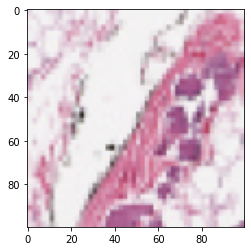

IDC positive
Prob Negative: 41.44%
Prob Positive 58.56%


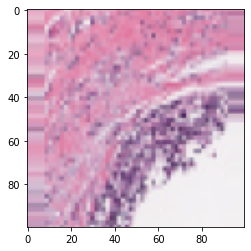

IDC negative
Prob Negative: 96.69%
Prob Positive 3.31%


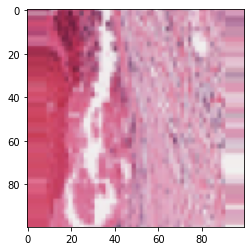

IDC positive
Prob Negative: 100.00%
Prob Positive 0.00%


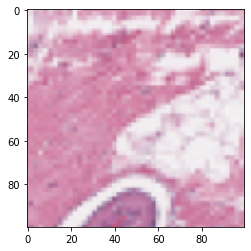

IDC negative
Prob Negative: 93.02%
Prob Positive 6.98%


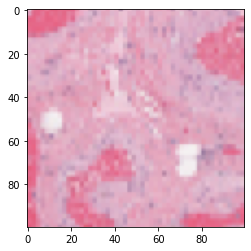

IDC positive
Prob Negative: 87.15%
Prob Positive 12.85%


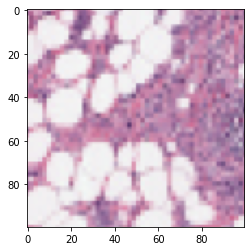

In [ ]:
x, y = valid_batches_bench.next()

for i in range(1,10):
  
  image = x[i]
  label = y[i]
  
  for j in label:
    if j == 1:
      print('IDC negative')
      break
    if j+1 == 1:
      print('IDC positive')
      break
    else:
      break

  prob = transfer.predict(image.reshape(1,100,100,3))
  for a in prob:
    for b in a:
      print(f'Prob Negative: {(b*100):1.2f}%')
      print(f'Prob Positive {(1-b)*100:1.2f}%')
      break

  plt.imshow(image)
  plt.show()

# Conclusion
Accuracy of sequential model is 84%
accuracy for 1*1 convolution is 84%
accuracy for inception is 85%(transfer learning)
accuracy for vgg-19 is 86%(transfer Learning)


In pattern recognition, information retrieval and classification (machine learning), precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.




In statistical analysis of binary classification, the F-score or F-measure is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive.